In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io

plt.rcParams['figure.figsize'] = [14, 14]
plt.rcParams.update({'font.size': 18})

mat = scipy.io.loadmat("/mnt/c/Users/nikhi/Documents/sem4/mis/project/allFaces.mat")
faces = mat['faces']
nfaces = mat['nfaces'].reshape(-1)

In [2]:
def add_noise(img):
 
    # Getting the dimensions of the image
    row , col = img.shape
     
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = np.random.randint(300, 10000)*5
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord= np.random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord= np.random.randint(0, col - 1)
         
        # Color that pixel to white
        img[y_coord][x_coord] = 255
         
    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = np.random.randint(300 , 10000)*5
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord= np.random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord= np.random.randint(0, col - 1)
         
        # Color that pixel to black
        img[y_coord][x_coord] = 0
         
    return img

In [3]:
def patch_noise(data):
    no_of_pixels , no_of_images = data.shape  
    patch_size = 40
    for i in range(no_of_images):
        image = data[:, i] 
        image = image.reshape(168, 192)
        row_start = np.random.randint(0, image.shape[0]-patch_size)
        row_end = row_start + patch_size
        col_start = np.random.randint(0, image.shape[1]-patch_size)
        col_end = col_start + patch_size
        image[row_start:row_end, col_start:col_end] = 0
        data[:,i] = image.reshape(-1) 
        
    return data   

In [4]:
## Function Definitions

def shrink(X,tau):
    Y = np.abs(X)-tau
    return np.sign(X) * np.maximum(Y,np.zeros_like(Y))
def SVT(X,tau):
    U,S,VT = np.linalg.svd(X,full_matrices=0)
    out = U @ np.diag(shrink(S,tau)) @ VT
    return out
def RPCA(X):
    n1,n2 = X.shape
    mu = n1*n2/(4*np.sum(np.abs(X.reshape(-1))))
    lambd = 1/np.sqrt(np.maximum(n1,n2))
    thresh = 10**(-7) * np.linalg.norm(X)
    
    S = np.zeros_like(X)
    Y = np.zeros_like(X)
    L = np.zeros_like(X)
    count = 0
    while (np.linalg.norm(X-L-S) > thresh) and (count < 1000):
        L = SVT(X-S+(1/mu)*Y,1/mu)
        S = shrink(X-L+(1/mu)*Y,lambd/mu)
        Y = Y + mu*(X-L-S)
        count += 1
    return L,S

In [6]:
def my_plot(X,L,S, k): 
    fig,axs = plt.subplots(1,3)
    axs = axs.reshape(-1)
    axs[0].imshow(np.reshape(X[:,k-1],(168,192)).T,cmap='gray')
    axs[0].set_title('X')
    axs[1].imshow(np.reshape(L[:,k-1],(168,192)).T,cmap='gray')
    axs[1].set_title('L')
    axs[2].imshow(np.reshape(S[:,k-1],(168,192)).T,cmap='gray')
    axs[2].set_title('S')
    for ax in axs:
        ax.axis('off')

In [5]:
X = faces[:,:nfaces[0]+nfaces[1]]
L,S = RPCA(X)

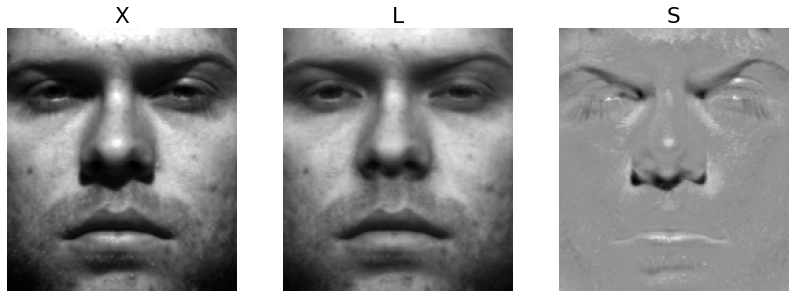

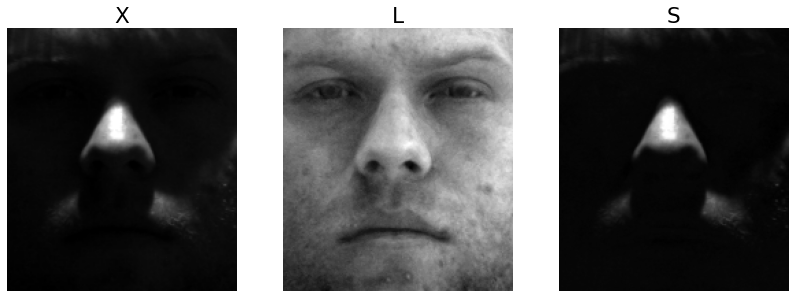

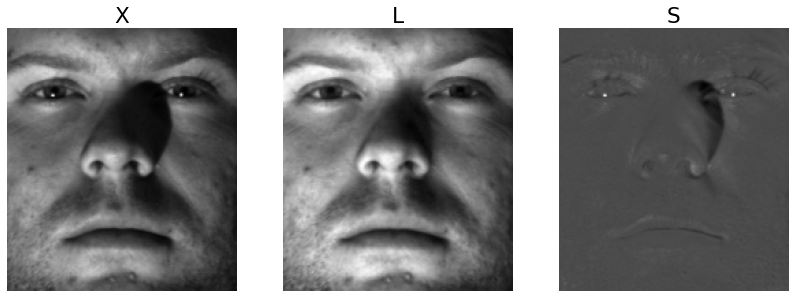

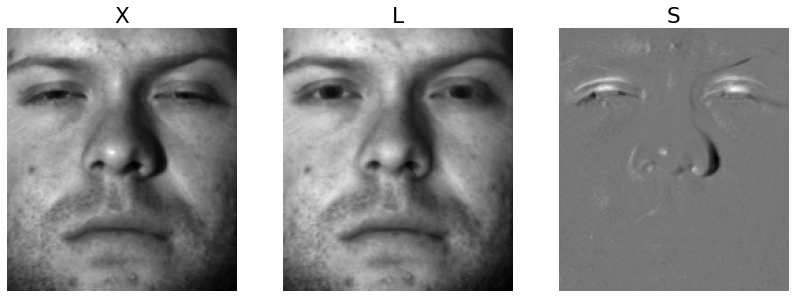

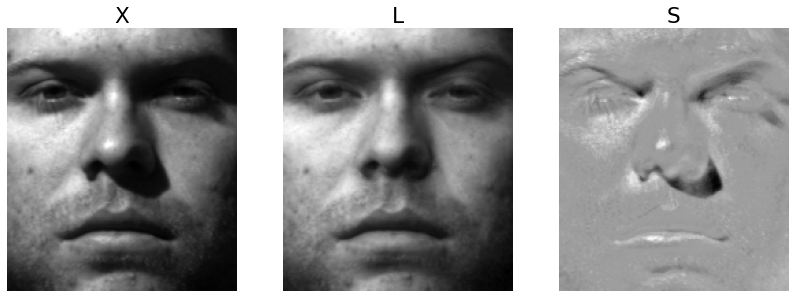

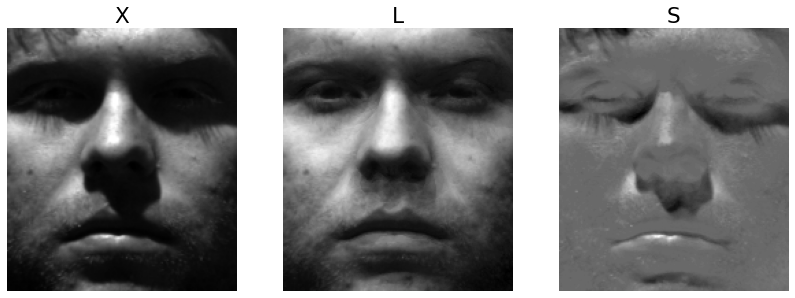

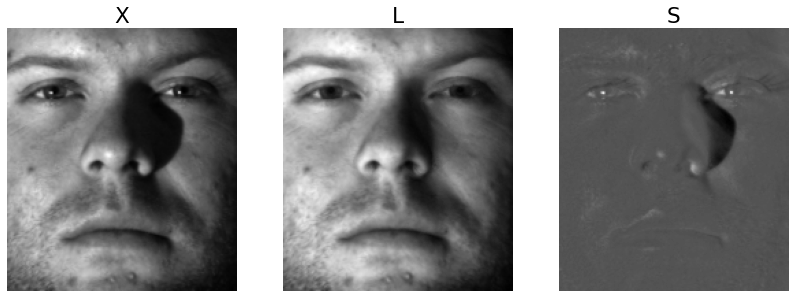

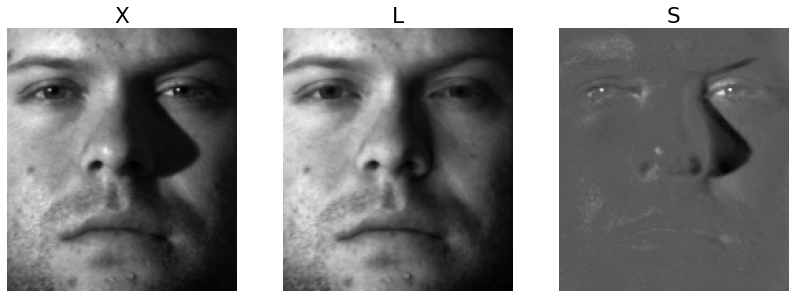

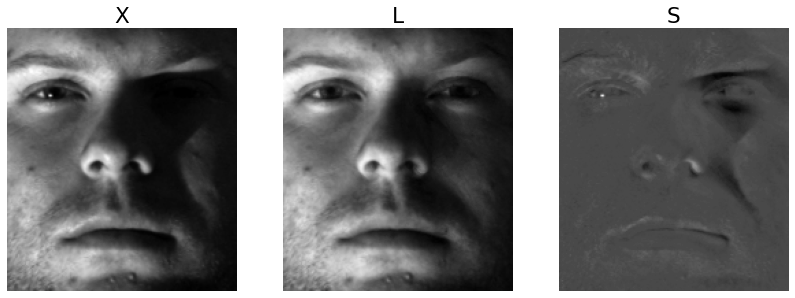

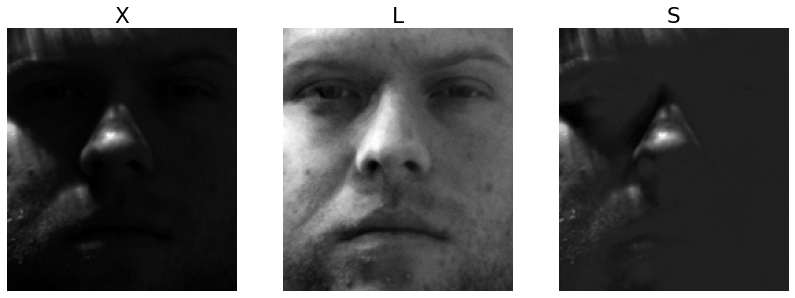

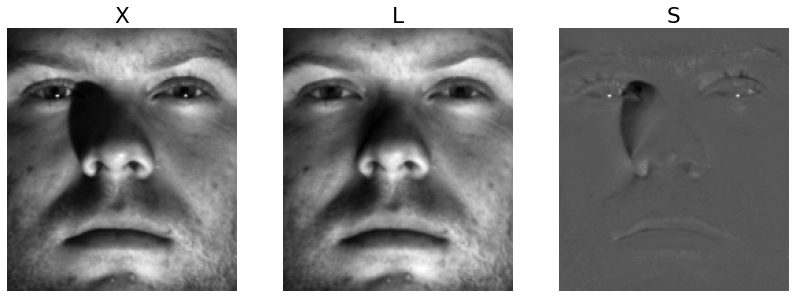

In [7]:
inds = (3,4,14,15,17,18,19,20,21,32,43)

for i in inds:
    my_plot(X,L,S, i)

In [8]:
X2 = add_noise(X) 

In [9]:
L2,S2 = RPCA(X2)

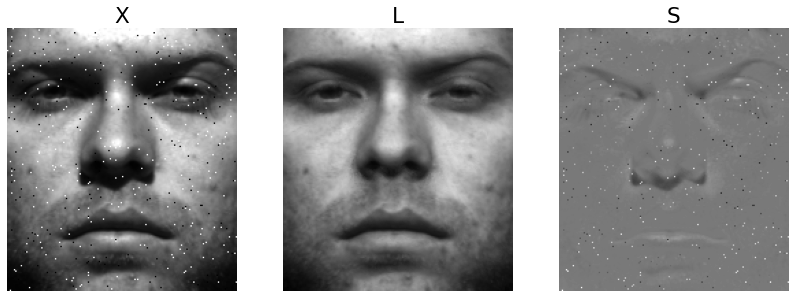

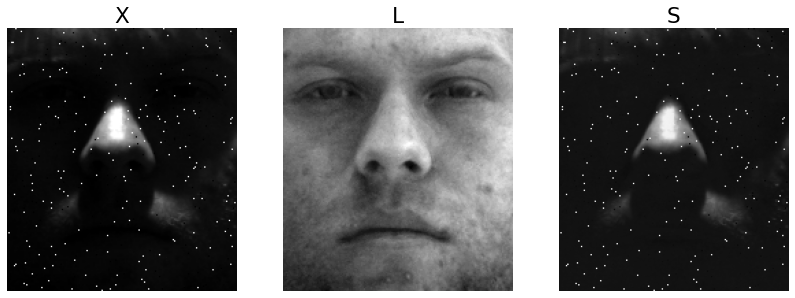

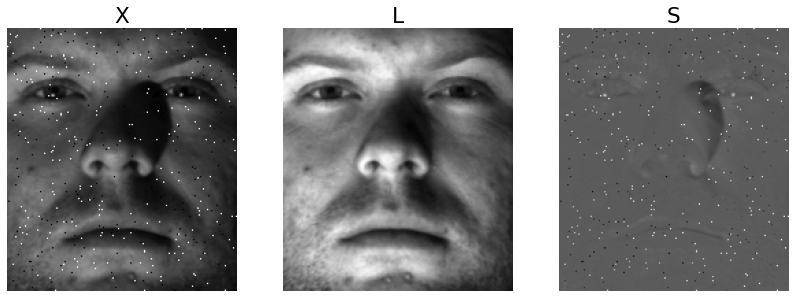

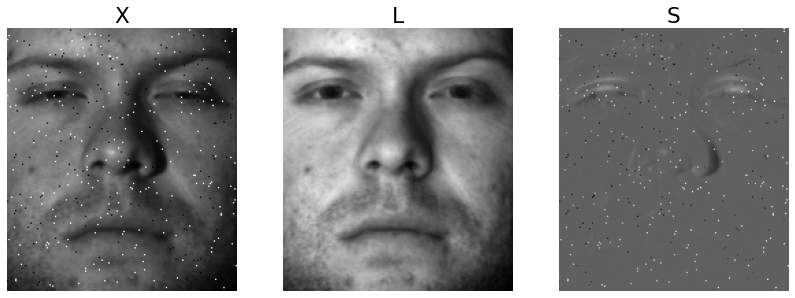

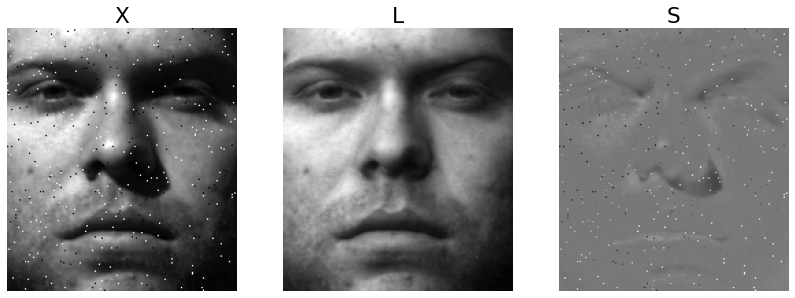

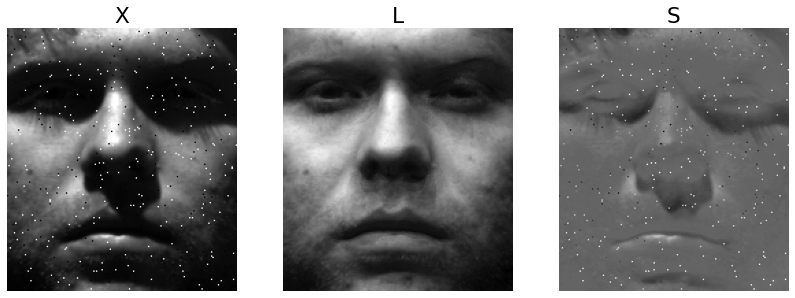

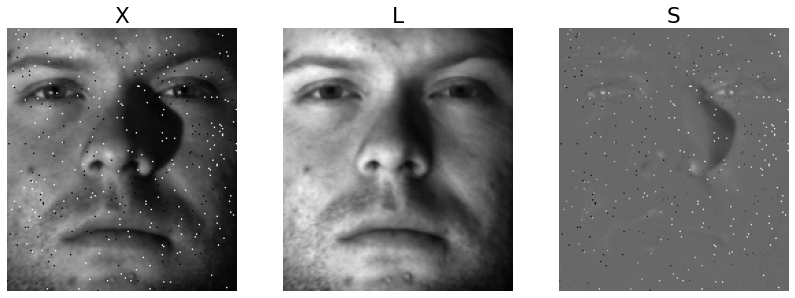

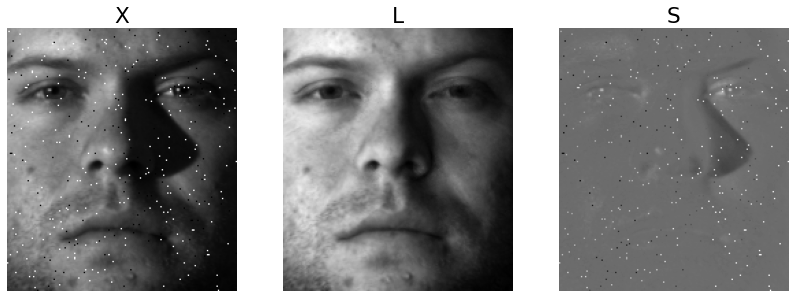

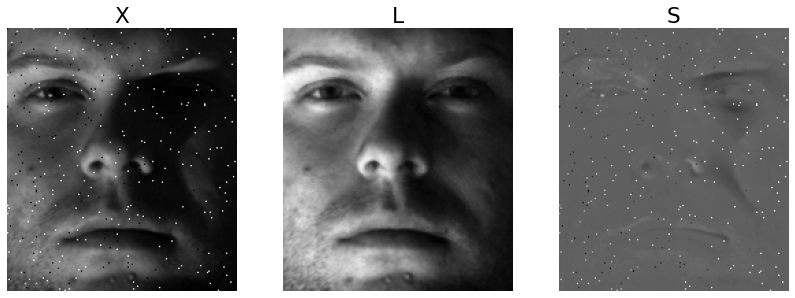

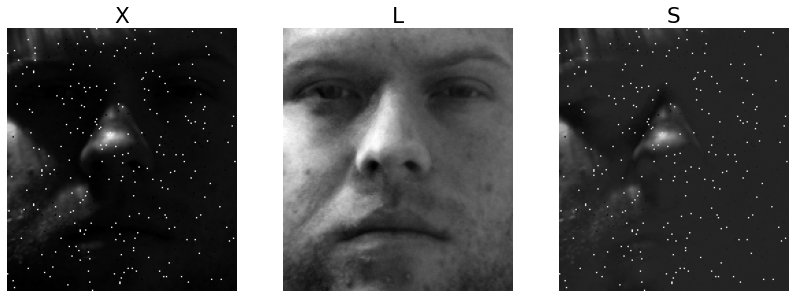

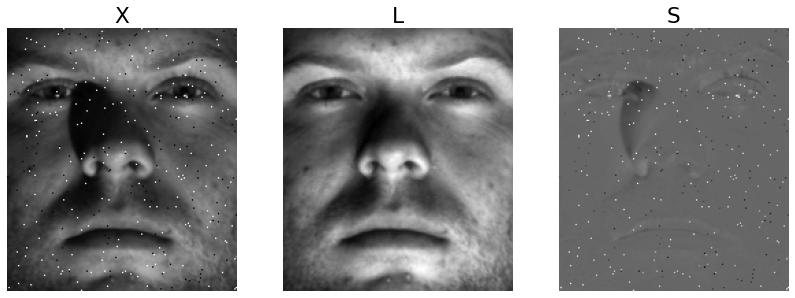

In [10]:
for i in inds:
    my_plot(X2,L2,S2, i)

In [11]:
X3 = patch_noise(X) 

In [12]:
L3,S3 = RPCA(X3)

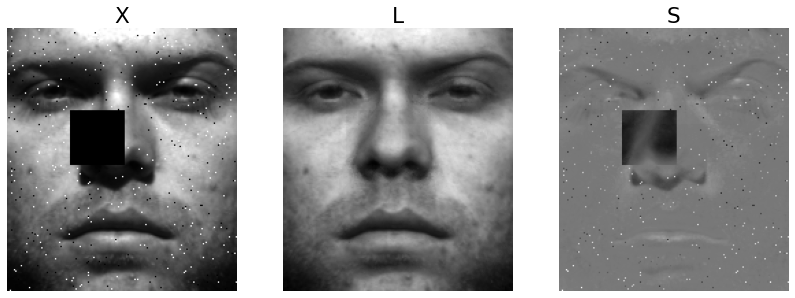

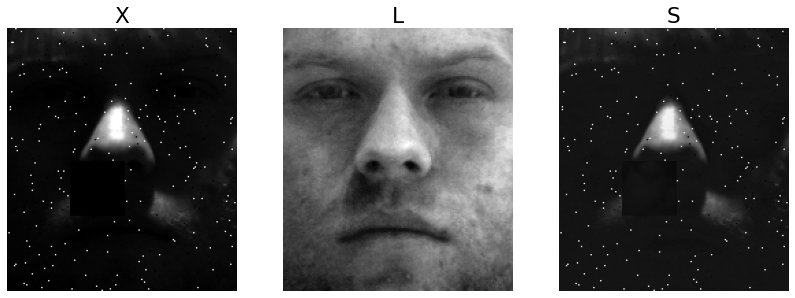

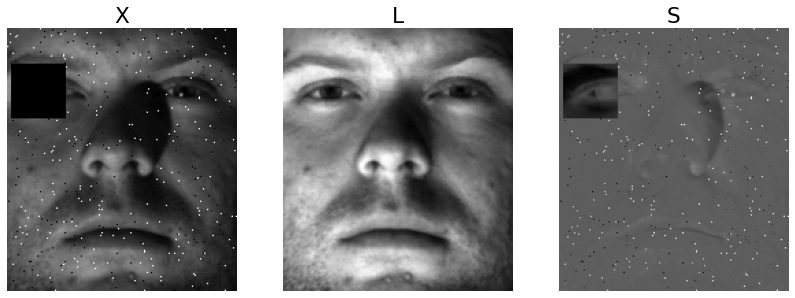

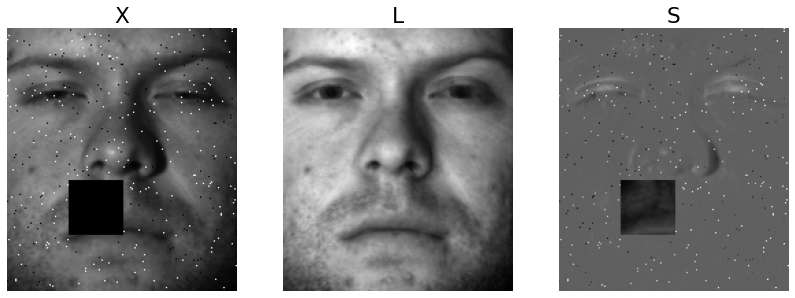

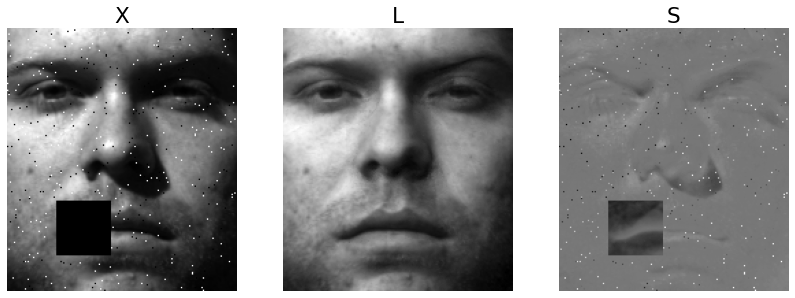

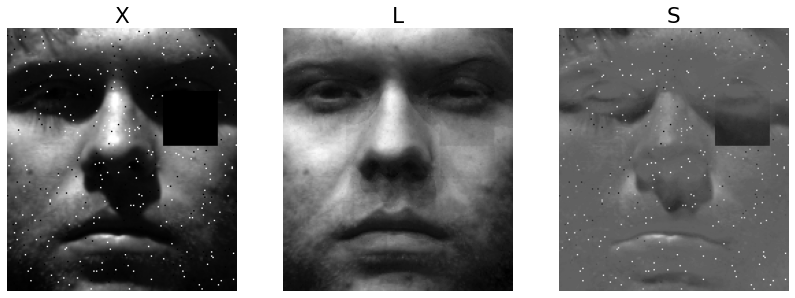

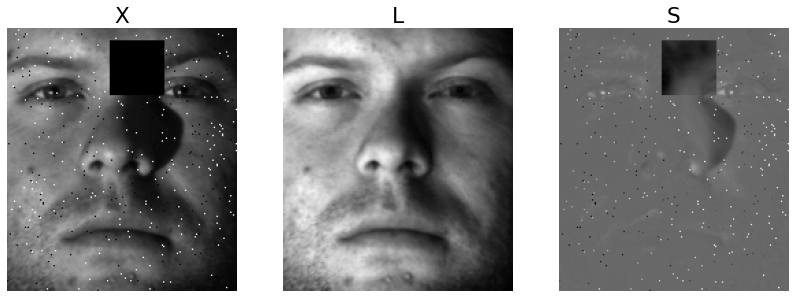

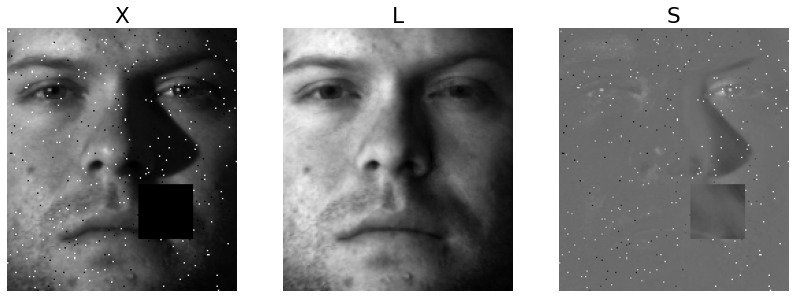

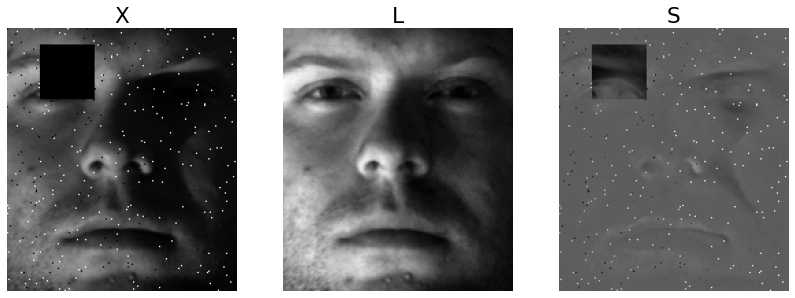

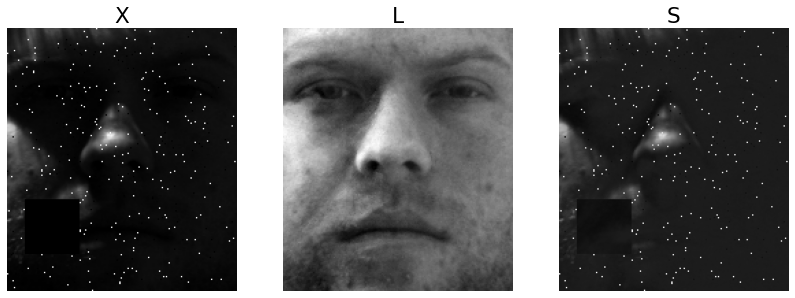

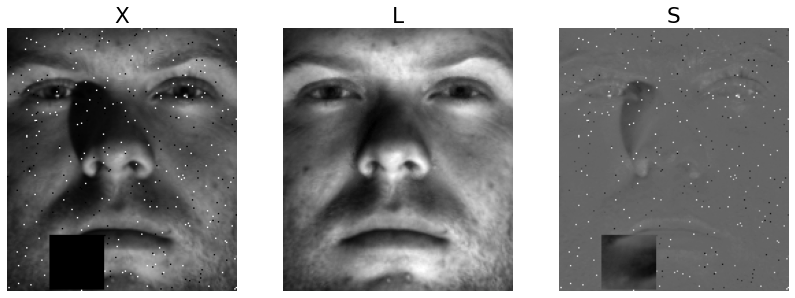

In [13]:
for i in inds:
    my_plot(X3,L3,S3, i)